# `BIKE SHARING CASESTUDY USING MULTIPLE LINEAR REGRESSION`

### `SIDDHANT NAIK`


# PROBLEM STATEMENT

#### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### 1. Which variables are significant in predicting Demand for bikes And 
### 2. How well these variables describe the bike demands

# BUSSINESS GOALS :

Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## A: IMPORTING LIBRARIES USED :

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## A1: EXPLORING DATASET 

In [2]:
bike = pd.read_csv("day.csv")
## Printing first five rows to confirm datset imported 
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
## Checking shape of the dataframe bikesha
bike.shape

(730, 16)

#### ` dataframe consists of 730 rows and 16 columns are we can say 16 variables `

In [4]:
## Let us Understand the data types of these 16 variables and Search for any Null values presence in these variables
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### There is `0 null values` presence found in these 16 variables out of which one is categorical variable and there is large number of numerical variables

In [5]:
### Let us Explore the Statistical attributes associated with numerical variables
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
### Let us get to know the list of variables which Will further help us to determine the machine learning models.
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### List of variables out of which we will be finding our Independent variables and Dependent variables :
'instant', 
'dteday', 
'season', 
'yr',
'mnth', 
'holiday', 
'weekday',
'workingday',
'weathersit', 
'temp', 
'atemp', 
'hum', 
'windspeed',
'casual',
'registered', 
'cnt'

## A2: DATA CLEANING 

### DROP  VARIABLES WHICH ARE MOT USEFULL FOR ANALYSIS

In [7]:
## As target variable cnt A sum of casual and registered variables
## which are not required during the time of predictions and leads to
## data leakage So it's better to drop them

bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

In [8]:
bike.head()
## As it's clearly visible that the casual and registered columns or 
## variables are being dropped

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
## Another variable that can be dropped is the instant variable as its Simply
## denoting the row index number which is quite not required over here for analysis

bike.drop(['instant'], axis = 1, inplace = True)

In [10]:
bike.head()
## So it's clearly visible that our data frames variables are stating from dte day

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Another variable which can be dropped is dteday 
## But will first  derive new variable which will indicate how old 
## the business is with the help of dteday.

bike['days_old'] = (pd.to_datetime(bike['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [12]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [13]:
## DROPPING DTEDAYS VARIABLE
bike.drop(['dteday'], axis = 1, inplace = True)

In [14]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [15]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


### So after deleting we can analyse that we are left with 13 variables and no null values presence

In [16]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [17]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [18]:
bike.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [19]:
bike.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

### So It's quite clear that some variables such as mnth ,weekday weathersit and season are quite categorical variables or features

In [20]:
## Lets find out the correlations between features of the dataframe bike
bike.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


##  HANDLING OUTLIERS

In [21]:
## Let us find the continuity in the values of the various variables present
bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

### As we can see temp , atemp ,hum and windspeed is having continuous values

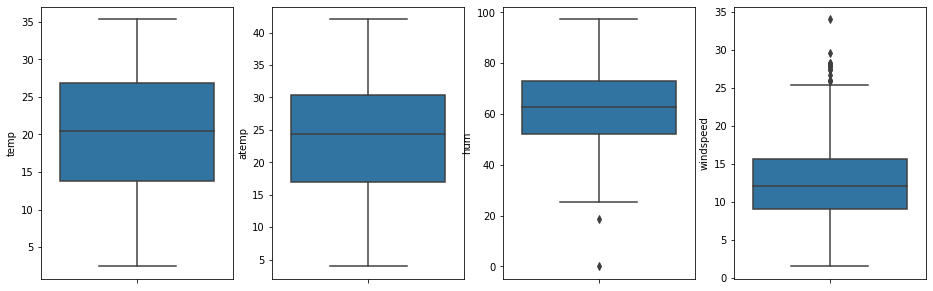

In [22]:
# Let us check the outliers presence in the Independent variables 
# having continuous values
vari=['temp','atemp','hum','windspeed']
plt.figure(figsize=(20,5))
i=1
for var in vari:
    plt.subplot(1,5,i)
    sns.boxplot(y=var, data=bike)
    i+=1

### With the help of above box plots we can determine there is no presence of outliers in the dataframe

# A3:  EXLORATORY DATA ANALYSIS (EDA)

##  Handling categorical variables(Conversion of numerical types to categorical types )

In [23]:
# As we got a view that season weathers in mnth and weekday were categorical variables but using numerical data type is important 
bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike.mnth = bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike.weekday = bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


##  Checking linear relationship with the help of pair plots for continous variables relationship with each other 

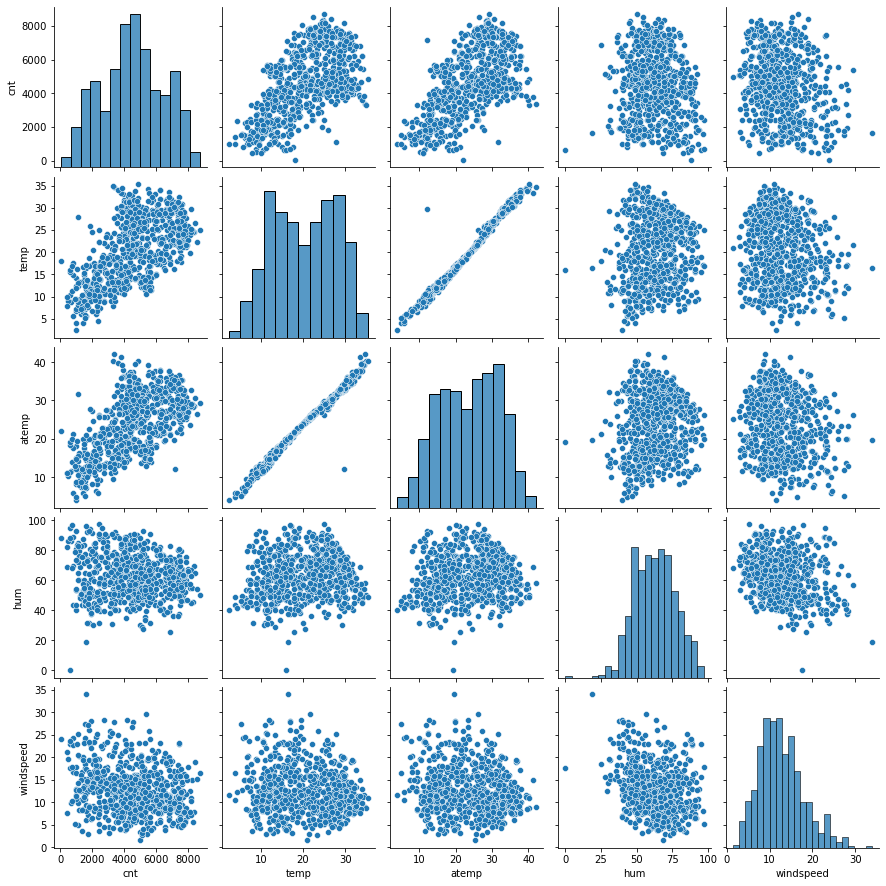

In [24]:
sns.pairplot( data=bike,
           vars=['cnt','temp', 'atemp', 'hum','windspeed'])
plt.show()

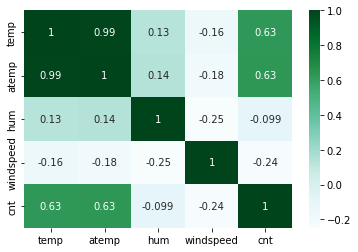

In [25]:
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

### INSIGHTS: atemp and temp are highly correlated to each other around 1 correlation showing .

##  CORRELATION BETWEEN ALL NUMERICAL VARIABLES

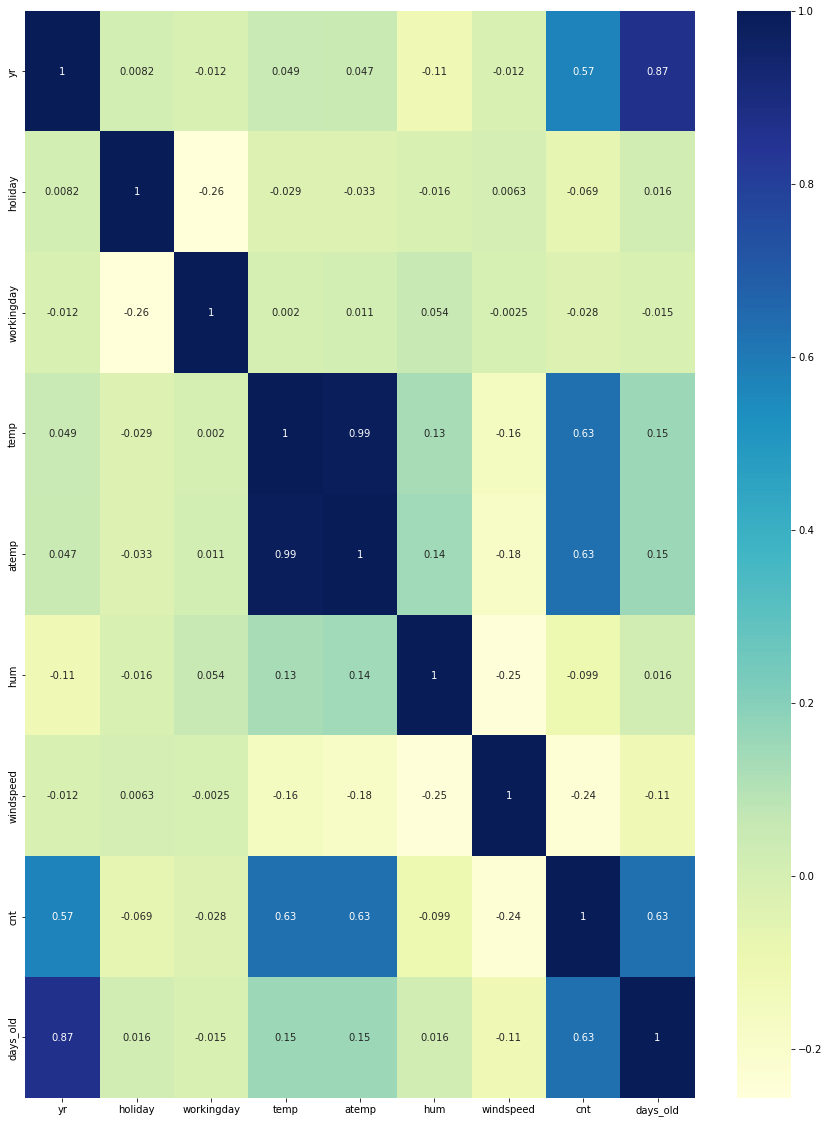

In [26]:
#Calculate Correlation
corr = bike.corr()
plt.figure(figsize=(15,20))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

#### INSIGHTS : From heat map it is clear that temp,  Atemp ,days_old are the variables which are highly correlated and should be considered for building the modelAs we can see target variable has linear relationship with some of the independent variables which shows a good sign for building a linear regression model .

##  ANALYSES ON CATEGORICAL VARIABLES WITH TARGET VARIABLE

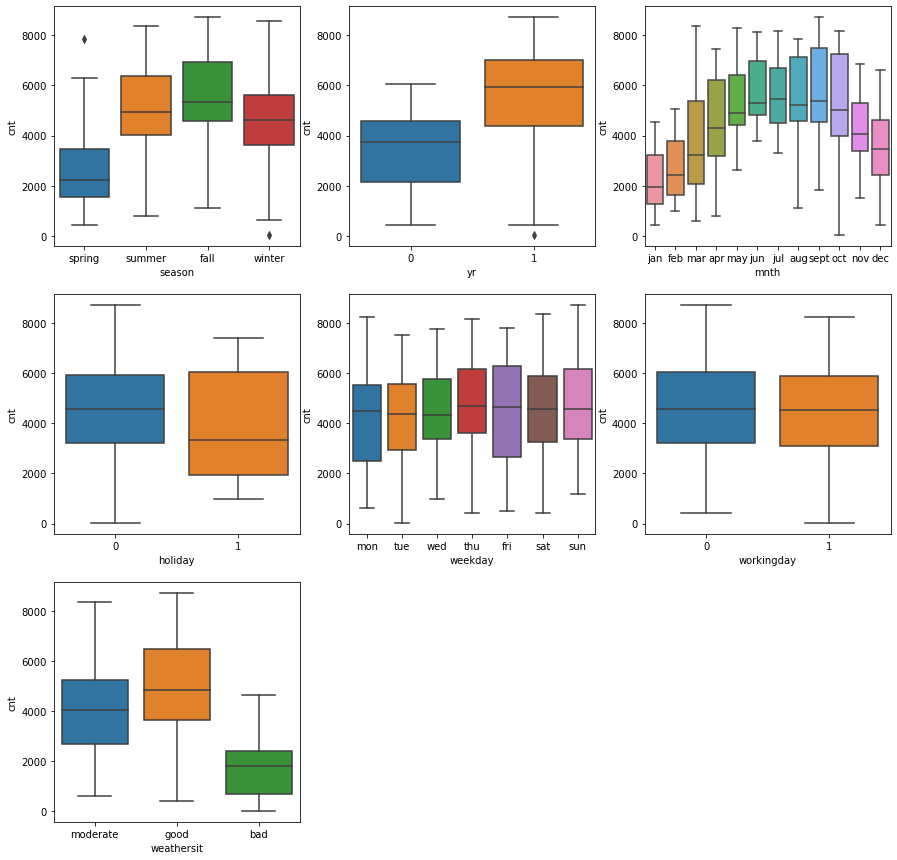

In [27]:
category = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(category):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike, x=i[1], y='cnt')
plt.show()

## INSIGHTS:
1. Fall season shows higher demands .
2. Demand for 2019 year had higher demands.
3. Demand was increasing quite continously till June and reached its higher demand till september and then shows dip after spetember month .
4. When weather is clear and during holiday too only when demand were higher for bikes .

## ANALYSES ON NUMERICAL VARIABLES WITH TARGET VARIABLE

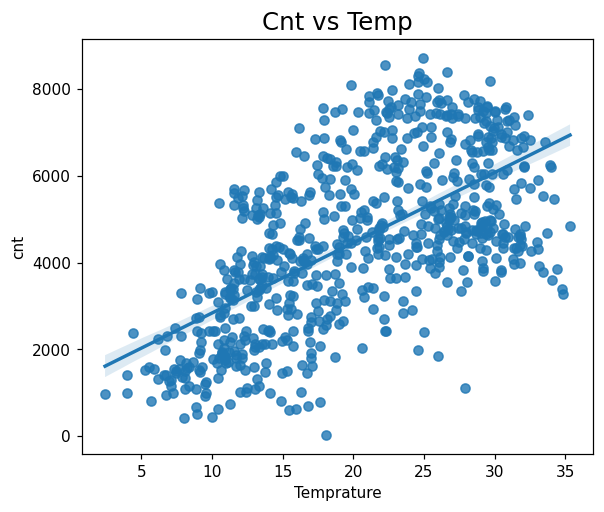

In [28]:
# CNT VS TEMP
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike,y="cnt",x="temp")
plt.xlabel("Temprature")
plt.show()

### INSIGHTS: As cnt is linearly increasing with temparture and demand for bikes are increasing positively .

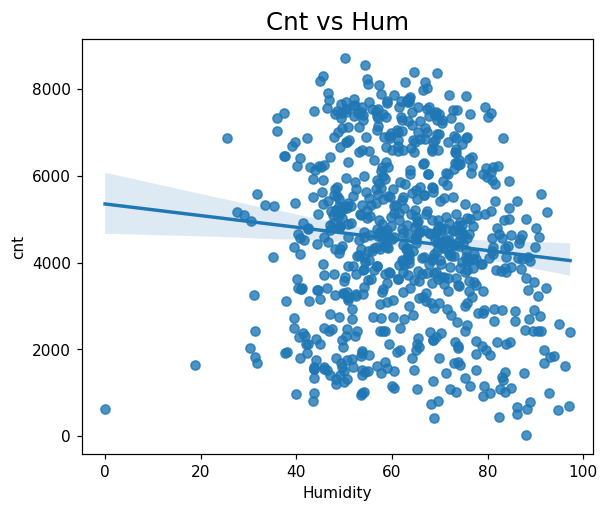

In [29]:
# CNT VS TEMP
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bike,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

### INSIGHTS :As cnt is Decreasing with the increase in humidity and values of humidity are scattered .

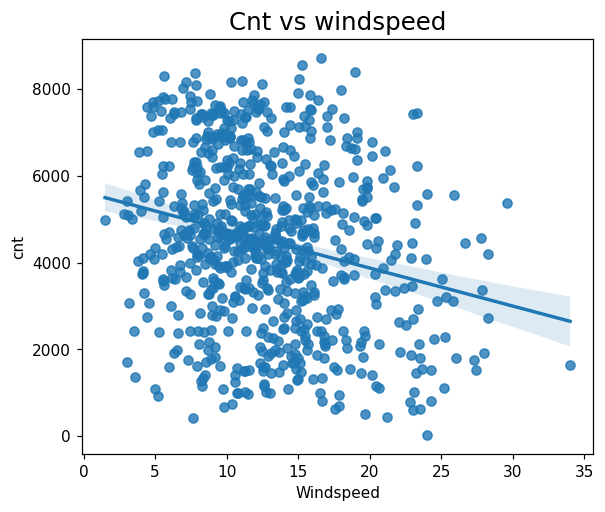

In [30]:
# CNT VS TEMP
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs windspeed",fontsize=16)
sns.regplot(data=bike,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.show()

### INSIGHTS : As Wind speed increases the value of target variable is also decreasing .

## AS WITH EDA STEP WE HANDLED OUTLIERS AND MISSING VALUES AND DATA TYPES CONVERSION IF REQUIRED .

## We also get to know Temp and Atemp also have high correlation with cnt variable which is our target variables too .

In [31]:
bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


In [32]:
bike.shape

(730, 13)

In [33]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


## Let us move forward for regression model building with dataframe with 13 variables or features

# B. DATA PREPARATION FOR LINEAR REGRESSION MODEL

###  CREATE DUMMY VARIABLES FOR ALL CATEGORICAL VARIABLES

In [35]:
bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday"],drop_first=True)
bike = pd.get_dummies(data=bike,columns=["weathersit"])

In [36]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [37]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


In [38]:
bike.shape

(730, 32)

###  SPLITING DATAFRAME INTO TRAINING AND TEST DATASET

In [39]:
# Creating y which will have only target variable 
y=bike.pop('cnt')

In [40]:
#Creating X containing our independent variables or predictor variables
X=bike

In [41]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

### Spliting the data into Train Test in the Ratio of 70:30

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [44]:
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


In [45]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,653,0,0,...,0,0,0,0,0,0,1,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,576,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,426,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,728,1,0,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,482,0,1,...,0,0,0,1,0,0,0,0,0,1


###  FEATURE SCALING FOR CONTINOUS VARIABLE

In [46]:
# List of continous variable 
varnum=['temp','atemp','hum','windspeed','days_old']

In [47]:
#Used normalized scaler to scale 
scaled= MinMaxScaler()

In [48]:
#Fit transform only training set
X_train[varnum]=scaled.fit_transform(X_train[varnum])

In [49]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.712329,0.537386,0.513133,0.650333,0.320844,0.505822,0.242661,0.246575,...,0.080235,0.154599,0.129159,0.136986,0.142857,0.152642,0.136986,0.029354,0.626223,0.344423
std,0.500412,0.157613,0.453121,0.225640,0.212202,0.145741,0.169639,0.288146,0.429112,0.431440,...,0.271923,0.361876,0.335704,0.344170,0.350270,0.359994,0.344170,0.168963,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.256181,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.512363,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.758929,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# B1. FEATURE SELECTION 

###  USING RECURSIVE FEATURE ELIMINATION to eliminate some columns

In [50]:
#Built a linear regression model named liner using SKLearn for RFE
liner= LinearRegression()
liner.fit(X_train,y_train)

LinearRegression()

In [51]:
# ELIMINATED FEATURES TO 15 using AUTOMATED APPROACH
rfe= RFE(liner,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [52]:
#PREVIEWING LIST OF ALL THE FEATURES SELECTED WITH THEIR WEIGHTS
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', False, 7),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', False, 14),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 13),
 ('mnth_jun', False, 9),
 ('mnth_mar', False, 17),
 ('mnth_may', False, 8),
 ('mnth_nov', False, 15),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

###  USING MANUAL ELIMINATION APPROACH USING VIF 

In [53]:
## Functions which takes the columns to be selected for model as a paremeter 
## using StatsModel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [54]:
## Functions which takes the columns for which VIF to be derieve as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [55]:
#Feature to be selected 
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [56]:
#feature not selected 
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_spring', 'mnth_dec', 'mnth_feb',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [57]:
# List of 15 columns required by RFE for regression 
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']]

In [58]:
X_train_rfe.shape

(511, 15)

# B2. MODEL BUILDING

### MODEL 1 : ALL COLUMNS SELECTED BY RFE

In [59]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.0
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          7.02e-190
Time:                        18:34:02   Log-Likelihood:                -4121.5
No. Observations:                 511   AIC:                             8273.
Df Residuals:                     496   BIC:                             8337.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1077.7065    

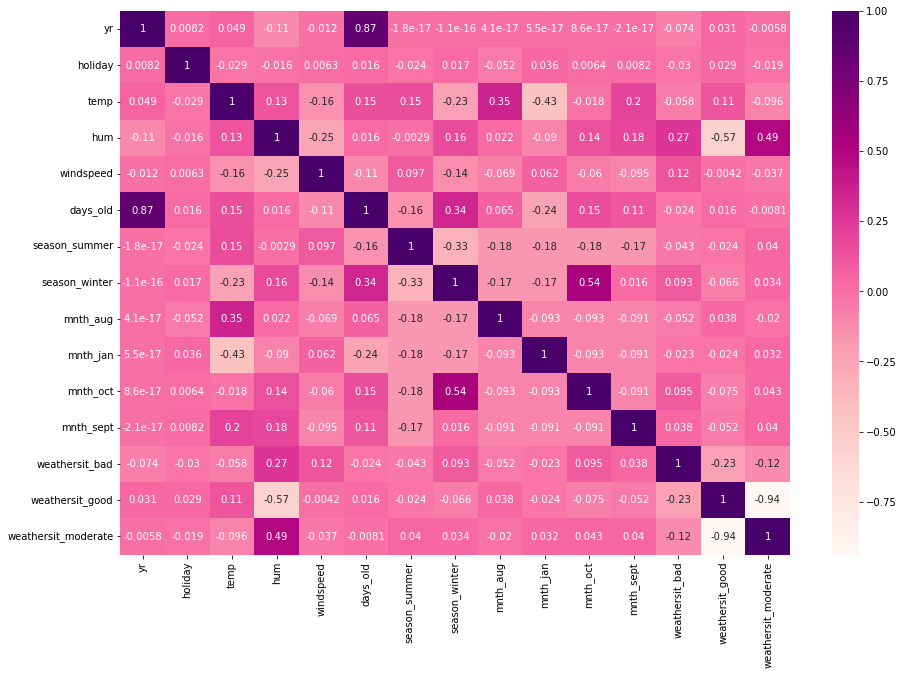

In [60]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bike[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']].corr(), cmap='RdPu', annot=True)
plt.show()

### MODEL 2

In [61]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          2.79e-189
Time:                        18:59:11   Log-Likelihood:                -4123.0
No. Observations:                 511   AIC:                             8276.
Df Residuals:                     496   BIC:                             8339.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2629.6612    

### MODEL 3: 

In [62]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.5
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          2.97e-186
Time:                        18:59:23   Log-Likelihood:                -4132.9
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     497   BIC:                             8353.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1927.4476    

### MODEL 4:

In [63]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.4
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          1.31e-183
Time:                        18:59:32   Log-Likelihood:                -4142.0
No. Observations:                 511   AIC:                             8310.
Df Residuals:                     498   BIC:                             8365.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1777.7864    

### MODEL 5:

In [64]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.6
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          3.19e-183
Time:                        18:59:37   Log-Likelihood:                -4145.7
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     499   BIC:                             8366.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1699.6727    

### MODEL 6:

In [65]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     157.5
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          1.69e-147
Time:                        18:59:42   Log-Likelihood:                -4233.0
No. Observations:                 511   AIC:                             8488.
Df Residuals:                     500   BIC:                             8535.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5069.8633    

### MODEL 7

In [66]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     76.86
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           1.87e-94
Time:                        18:59:47   Log-Likelihood:                -4358.7
No. Observations:                 511   AIC:                             8739.
Df Residuals:                     500   BIC:                             8786.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3656.1636    

### MODEL 8:

In [67]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     145.1
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          7.76e-141
Time:                        18:59:52   Log-Likelihood:                -4248.7
No. Observations:                 511   AIC:                             8519.
Df Residuals:                     500   BIC:                             8566.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4687.9135    

### MODEL 9:

In [68]:
# using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     145.0
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          8.95e-141
Time:                        18:59:57   Log-Likelihood:                -4248.9
No. Observations:                 511   AIC:                             8520.
Df Residuals:                     500   BIC:                             8566.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4703.0314    

### MODEL 10:

In [69]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.1
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          5.17e-179
Time:                        19:00:01   Log-Likelihood:                -4161.3
No. Observations:                 511   AIC:                             8343.
Df Residuals:                     501   BIC:                             8385.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1671.8288    

### INSIGHTS:
1. VIF seems to be accpeted .
2. p-value for all features is almost 0.0 and R2 is 0.82
3. Let us select model 10 as our final as it has all important statistics high along with no insignificant variables and no multicolinearities variable
4. Difference between R Square and adjusted R ^2 values for this model is very less which means that It seems that no additional parameters required to be removed from this model. 

In [70]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    liner1 = LinearRegression()
    liner1.fit(X,y)
    return liner1


In [71]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
liner = build_model_sk(X_train[cols],y_train)
print(liner.intercept_,liner.coef_)

1671.8288276694761 [ 2032.97855066  -998.54901883  -604.09184185   454.33134357
   530.93787568   176.12606815 -2563.22009348  -676.93248744
  4098.07420447]


# B3: MODEL EVALUATION

### Residual Analysis

In [72]:
y_predtrain= liner.predict(X_train[cols])

In [73]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

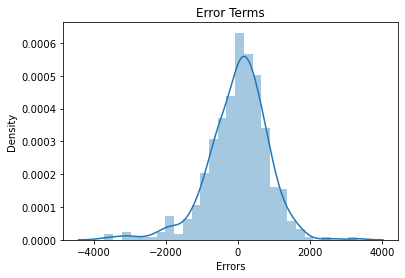

In [74]:
plot_res_dist(y_train, y_predtrain)

#### Errors are normally distribured here with mean 0. So everything seems to be fine

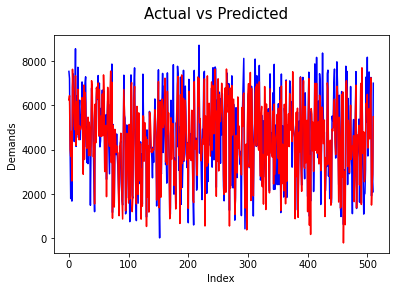

In [75]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_predtrain, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result predicting almost the same pattern so this model seems to be correct

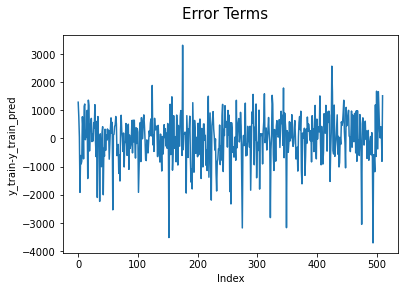

In [76]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_predtrain)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

### Error terms are also independent from each other 

In [77]:
#Print R-squared Value
r2_score(y_train,y_predtrain)

0.8179567805460208

### INSIGHTS: R2 same as we obtained from our final model

###  Linearilty Check

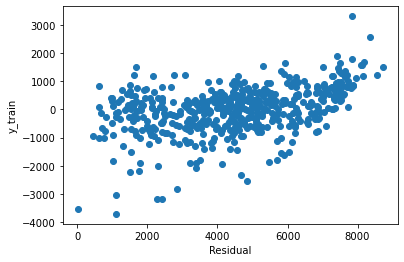

In [78]:
# scatter plot for the check
residual = (y_train - y_predtrain)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Predict values for test data set

In [79]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaled.transform(X_test[num_vars])

In [80]:
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']
y_predtest = liner.predict(X_test[cols])

###  R-Squared value for test predictions

In [81]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_predtest)

0.8112514007079155

### INSIGHTS: 
1. R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818).
2. This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

###  Homoscedacity

Text(0, 0.5, 'y_test_pred')

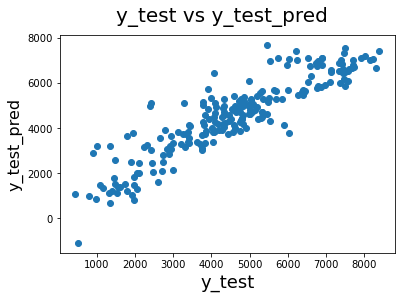

In [82]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_predtest)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                               # X-label
plt.ylabel('y_test_pred', fontsize = 16)

### INSIGHTS : 
Variance Residual is quite constant across the predictions Which meant to say that the value of the predictor variable does not changes as the error term changes or vary.

###  Plot Test vs Predicted test values

In [83]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                                           # X-label
    plt.ylabel('Counts', fontsize=16)                                          # Y-label

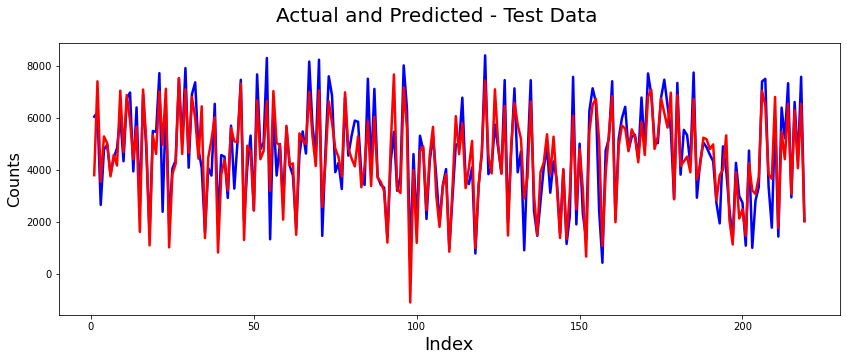

In [84]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_predtest,len(y_test)+1,'Test Data')

### Predictions of test data is quite very close to actual

### 8.7 Plot Error Terms for test data

In [85]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

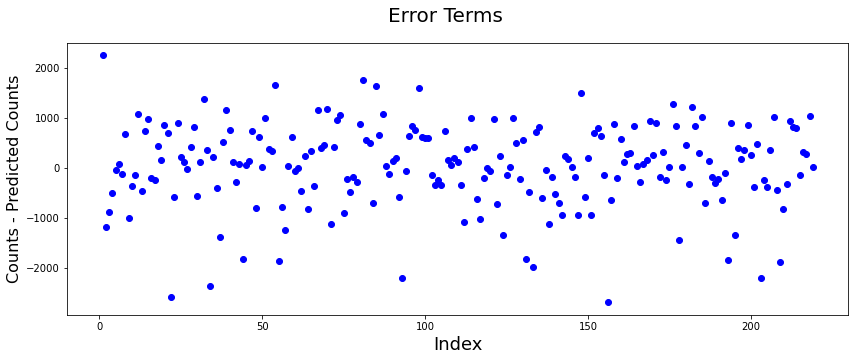

In [86]:
#Plot error terms for test data
plot_err_terms(y_test,y_predtest)

### Error terms are randomly distributed as no pattern found which means the output is explained well by the model and there are no other parameters that can explain the model much better

# B4 PREDICTIONS ANALYZED

In [88]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


### 8.1 INTERPRETING MODEL 

In [89]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.1
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          5.17e-179
Time:                        19:08:10   Log-Likelihood:                -4161.3
No. Observations:                 511   AIC:                             8343.
Df Residuals:                     501   BIC:                             8385.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1671.8288    

###  RESULTS INTERPRETED

### ACCORDING THE MODEL GENRATED , BOOM BIKES COULD FOCUS ON FOLLOWING UPGRADTIONS FOR BETTER RESULTS:
1. As compared to 2019 it is highly expected that there would be growth in the number of users as economic situation stabalizes after COVID-19
2. Demand was increasing quite continously till June and reached its higher demand till september and then shows dip after spetember month  which states that bussiness could be expanded well in the month of September .
3. Thursdays is the day of the week which shows higher demands for BoomBikes , so company could focus to provide larger number of bikes during few days of the week .

# CONCLUSION
## Variables significant in predicting Demand for bikes are as follows:
1. Year (2019)
2. Month (Jan , July , September , November, December)
3. weathersit(LightSnow, Mist+Cloudy)
4. Windspeed
5. Humidity
6. temp
7. Season
8. Holiday is or not 
9. Sunday 